In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##subsection


In [ ]:
print("hello")

hello


#Import/View the data

In [ ]:
houseprice = pd.read_csv("https://raw.githubusercontent.com/oceancode1997/dataset/master/WestRoxbury.csv")

In [ ]:
houseprice.head()


,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


The dataset has 5802 rows, 5802 houses, 14 different features

In [ ]:
houseprice.shape

(5802, 14)

## Check for Null value


In [ ]:
houseprice.isnull().sum()

TOTAL VALUE    0
TAX            0
LOT SQFT       0
YR BUILT       0
GROSS AREA     0
LIVING AREA    0
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL BATH      0
HALF BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

#Exploratory Data Analysis

(array([3.100e+01, 1.492e+03, 2.831e+03, 1.015e+03, 3.110e+02, 9.600e+01,
        1.900e+01, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([ 105.  ,  216.28,  327.56,  438.84,  550.12,  661.4 ,  772.68,
         883.96,  995.24, 1106.52, 1217.8 ]),
 <a list of 10 Patch objects>)

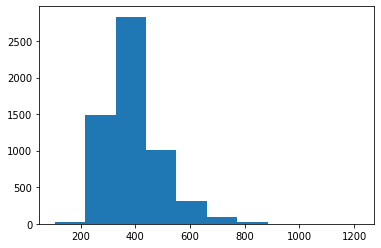

In [ ]:
plt.hist(houseprice['TOTAL VALUE'])

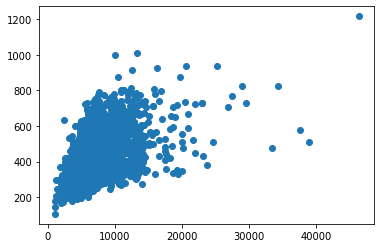

In [ ]:
plt.scatter(houseprice['LOT SQFT'],houseprice['TOTAL VALUE'])

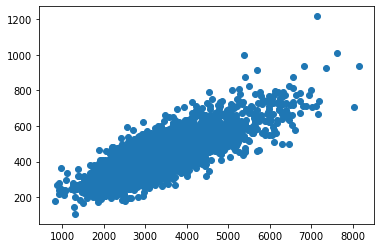

In [ ]:
plt.scatter(houseprice['GROSS AREA'], houseprice['TOTAL VALUE'])

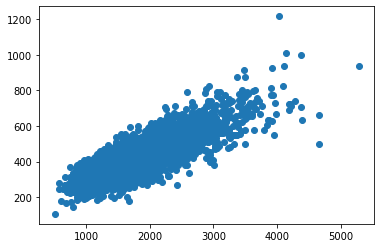

In [ ]:
plt.scatter(houseprice['LIVING AREA'], houseprice['TOTAL VALUE'])

In [ ]:
houseprice[houseprice['YR BUILT'] == 0]

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
1492,569.2,7160,7000,0,4732,2641,2.0,8,4,2,1,1,1,Recent


In [ ]:
houseprice.drop(index=1492, axis = 0,inplace = True)

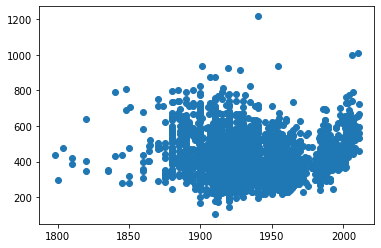

In [ ]:
plt.scatter(houseprice['YR BUILT'], houseprice['TOTAL VALUE'])

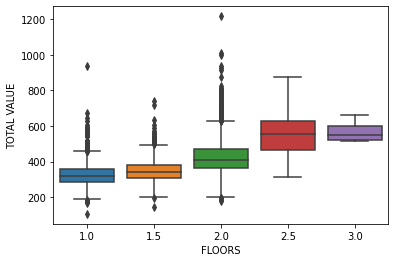

In [ ]:
sns.boxplot(x=houseprice['FLOORS'], y = houseprice['TOTAL VALUE'])

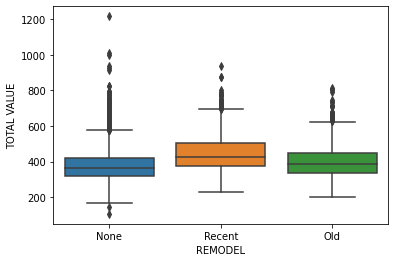

In [ ]:
sns.boxplot(x=houseprice['REMODEL'], y = houseprice['TOTAL VALUE'])

# Feature Engineering

# Data preprocessing

In [ ]:
dummy_columns = pd.get_dummies(houseprice['REMODEL'], drop_first= True)
dummy_columns

,Old,Recent
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
5797,0,1
5798,0,0
5799,0,0
5800,0,0


In [ ]:
houseprice = pd.concat([houseprice,dummy_columns],axis = 1)
houseprice

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL,Old,Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None,0,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent,0,1
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None,0,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None,0,0
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent,0,1
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,None,0,0
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,None,0,0
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,None,0,0


In [ ]:
houseprice.drop(["REMODEL", "TAX"], axis= 1, inplace=True)

In [ ]:
houseprice.head()

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,Old,Recent
0,344.2,9965,1880,2436,1352,2.0,6,3,1,1,1,0,0,0
1,412.6,6590,1945,3108,1976,2.0,10,4,2,1,1,0,0,1
2,330.1,7500,1890,2294,1371,2.0,8,4,1,1,1,0,0,0
3,498.6,13773,1957,5032,2608,1.0,9,5,1,1,1,1,0,0
4,331.5,5000,1910,2370,1438,2.0,7,3,2,0,1,0,0,0


#Split train and test

In [ ]:
from sklearn.model_selection import train_test_split
y = houseprice["TOTAL VALUE"]
X = houseprice.drop("TOTAL VALUE",axis = 1,inplace=False)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#Machine Learning models

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.8153279936632404

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 10).fit(X_train,y_train)
model.score(X_test,y_test)

0.7325577712474778

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train,y_train)
model.score(X_test,y_test)

0.8243583770605378

In [ ]:
from sklearn.svm import SVR
model = SVR().fit(X_train,y_train)
model.score(X_test,y_test)

0.5591171259909586

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train,y_train)
model.score(X_test,y_test)


0.6658038309828678

Linear Regression / Logistic Regression

K Nearest Neighbors

Decision Tree ==> Random Forest (Gradient Boosting)

Support Vector Machine

#Linear Regression


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#data preprocessing
X_train = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL VALUE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1551.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:31:39   Log-Likelihood:                -23983.
No. Observations:                4640   AIC:                         4.799e+04
Df Residuals:                    4626   BIC:                         4.808e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -266.3057     57.887     -4.600      0.000    -379.791    -152.820
LOT SQFT        0.0085      0.000     31.050      0.000       0.008       0.009
YR BUILT        0.1641      0.029      5.634      0.000       0.107       0.221
GROSS AREA      0.0337      0.002     18.300      0.000       0.030       0.037
LIVING AREA     0.0499      0.003     14.780      0.000       0.043       0.057
FLOORS         42.2546      1.918     22.034      0.000      38.495      46.014
ROOMS           0.2998      0.730      0.411      0.681      -1.130       1.730
BEDROOMS       -1.1584      1.100     -1.053      0.292      -3.314       0.998
FULL BATH      20.0122      1.526     13.115      0.000      17.021      23.004
HALF BATH      17.7149      1.398     12.674      0.000      14.975      20.455
KITCHEN       -16.5709      5.186     -3.195      0.001     -26.738      -6.404
FIREPLACE      17.8944      1.183     15.127      0.000      15.575      20.213
Old             3.2710      2.133      1.534      0.125      -0.910       7.452
Recent         24.5838      1.837     13.379      0.000      20.981      28.186
==============================================================================
Omnibus:                      229.943   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.132
Skew:                           0.073   Prob(JB):                    9.04e-181
Kurtosis:                       5.066   Cond. No.                     7.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_truncated = X_train.drop(["ROOMS","BEDROOMS","KITCHEN","Old"], axis=1)

In [ ]:
model = sm.OLS(y_train,X_truncated).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL VALUE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     2234.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:31:39   Log-Likelihood:                -23990.
No. Observations:                4640   AIC:                         4.800e+04
Df Residuals:                    4630   BIC:                         4.806e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -279.9131     56.555     -4.949      0.000    -390.787    -169.039
LOT SQFT        0.0085      0.000     31.029      0.000       0.008       0.009
YR BUILT        0.1617      0.029      5.636      0.000       0.105       0.218
GROSS AREA      0.0347      0.002     19.199      0.000       0.031       0.038
LIVING AREA     0.0475      0.003     14.790      0.000       0.041       0.054
FLOORS         43.2824      1.848     23.427      0.000      39.660      46.905
FULL BATH      19.4852      1.488     13.091      0.000      16.567      22.403
HALF BATH      17.5579      1.380     12.722      0.000      14.852      20.264
FIREPLACE      17.9478      1.183     15.171      0.000      15.628      20.267
Recent         24.2442      1.813     13.370      0.000      20.689      27.799
==============================================================================
Omnibus:                      233.755   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              841.998
Skew:                           0.091   Prob(JB):                    1.45e-183
Kurtosis:                       5.079   Cond. No.                     7.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
houseprice['KITCHEN'].value_counts()

1    5712
2      89
Name: KITCHEN, dtype: int64